In [2]:
# Reading Dataset
import pandas as pd
col_list=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share','price']
df=pd.read_fwf('http://www.stat.ufl.edu/~winner/data/airq402.dat',names=col_list)


#http://www.stat.ufl.edu/~winner/data/airq402.dat

C:\Users\Prasanna\Anaconda3\lib\site-packages\pandas\io\parsers.py:803: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [3]:
df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [4]:
#Checking OUTLIERS using boxplot
import seaborn as sns
sns.boxplot(df['Average Fare'])

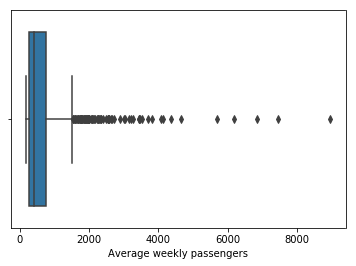

In [5]:
sns.boxplot(df['Average weekly passengers'])

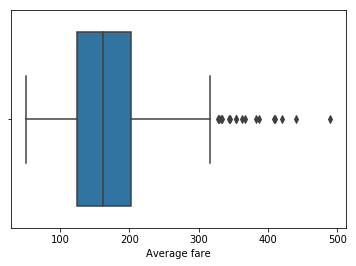

In [6]:
sns.boxplot(df['Average fare'])

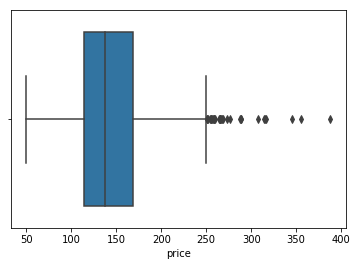

In [7]:
sns.boxplot(df['price'])

From the above box plots, We can see outliers for below columns
1.Average Fare
2.Average weekly passengers
3.Average fare
4.price
However Average Weekly passengers outliers points are scattered lightly between 2000 and 6000 and largely scattered between 6000 to 8000. I will remove those datapoints which are largely scattered.
Similarly for the price , maximum outliers are distributed near the max value 250 and 300. Hence I am considering the outilrers when it is more than 300

In [8]:
import numpy as np

In [9]:
q75, q25 = np.percentile(df['Average Fare'], [75 ,25])
iqr = q75 - q25
min = q25
max = q75 + (iqr*1.5)
#print(min,max)
df['Outlier'] = 0
df.loc[df['Average Fare'] < min, 'Outlier'] = 1
df.loc[df['Average Fare'] > max, 'Outlier'] = 1

In [10]:
q75, q25 = np.percentile(df['Average weekly passengers'], [75 ,25])
iqr = q75 - q25
min = q25
max = q75 + (iqr*1.5)
#print(min,max)
#df['Outlier'] = 0
#df.loc[df['Average weekly passengers'] < min, 'Outlier'] = 1
df.loc[df['Average weekly passengers'] > 6000, 'Outlier'] = 1

In [11]:
q75, q25 = np.percentile(df['Average fare'], [75 ,25])
iqr = q75 - q25
min = q25
max = q75 + (iqr*1.5)
#print(min,max)
#df['Outlier'] = 0
df.loc[df['Average fare'] < 300, 'Outlier'] = 0
df.loc[df['Average fare'] > 300, 'Outlier'] = 1

In [12]:
q75, q25 = np.percentile(df['price'], [75 ,25])
iqr = q75 - q25
min = q25
max = q75 + (iqr*1.5)
#print(min,max)
#df['Outlier'] = 0
df.loc[df['price'] < min, 'Outlier'] = 1
df.loc[df['price'] > max, 'Outlier'] = 1

In [13]:
#df['Outlier']==1
df[df['Outlier']==1]

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price,Outlier
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03,1
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86,1
18,ABQ,MSP,181.99,981,187.28,NW,65.00,182.27,CO,2.37,109.14,1
22,ABQ,PHX,71.57,328,1252.39,WN,77.65,70.99,WN,77.65,70.99,1
26,ABQ,TUS,77.82,321,191.19,WN,86.29,73.50,WN,86.29,73.50,1
28,AMA,DFW,74.82,324,615.10,WN,82.04,71.51,WN,82.04,71.51,1
33,ATL,BUF,117.85,712,446.41,DL,46.06,123.55,FL,46.01,110.49,1
35,ATL,ORD,146.06,606,2885.76,DL,40.28,161.88,FL,26.08,111.32,1
40,ATL,DAY,112.28,432,705.86,DL,61.65,117.78,FL,36.51,101.60,1
46,ATL,GSO,96.78,306,525.32,DL,75.35,105.10,FL,22.34,67.42,1


In [14]:
df_new=df[df['Outlier']==0]

In [15]:
df_new=df_new.drop(columns='Outlier')

In [16]:
Y=df_new['Average Fare']

In [ ]:
X=df_new.drop(columns='Average Fare')

In [18]:
df_new=df_new.rename(columns={'Average Fare':'Average_Fare'})

In [19]:
corr=df_new.corr()

In [20]:
corr.columns

Index(['Average_Fare', 'Distance', 'Average weekly passengers', 'market share',
       'Average fare', 'market share.1', 'price'],
      dtype='object')

In [21]:
X.corrwith(Y)<0.1

Distance                     False
Average weekly passengers     True
market share                  True
Average fare                 False
market share.1                True
price                        False
dtype: bool

In [22]:
cols=['Average weekly passengers','market share','price']

upper = corr.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [23]:
%matplotlib inline
import seaborn as sns

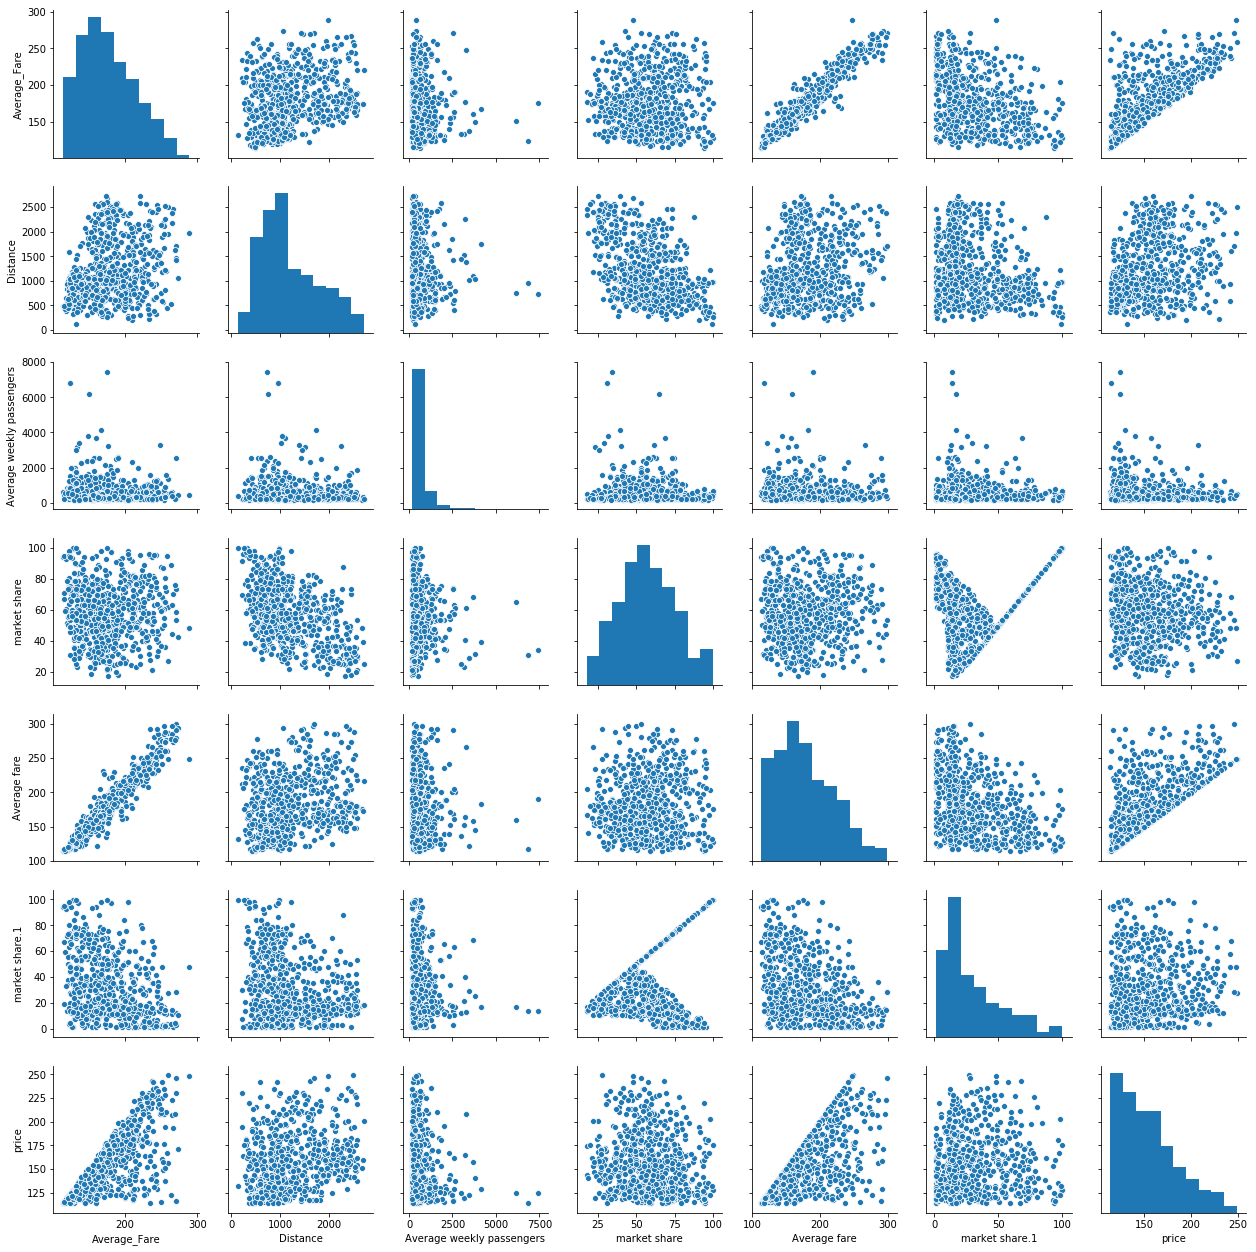

In [24]:
sns.pairplot(df_new)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df_new.apply(le.fit_transform)

In [34]:
Y=df.Average_Fare

In [35]:
X=df.drop(columns='Average_Fare')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(565, 10) (142, 10) (565,) (142,)


In [38]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print(regressor.coef_)

[ 0.15637548 -0.19796524  0.06424076 -0.03088152 -1.41206118  0.03370167
  0.80413993  0.82247682 -0.01361704  0.18604941]


In [40]:
print(regressor.intercept_)

-2.176154350597926


In [41]:
y_pred = regressor.predict(x_test)

In [42]:
print(y_pred-y_test.values)

[ 1.87609016e+00  3.96794238e+01  1.12864641e+01 -3.76218222e+01
  4.80268511e+01  2.47402503e+01  2.68139681e+00 -1.89091189e+01
 -7.00559262e+01  4.97109585e+01 -6.80228545e+01  2.47948731e+01
  6.77445467e+00 -4.99496497e+00  2.88446887e+00  1.00569860e+01
 -2.06767104e+01 -2.73827692e+00 -4.30336764e+00 -8.89303876e+01
 -6.70282789e+01 -5.24794830e+00 -4.31209303e+01  1.76864829e+01
  3.17305937e+01 -3.15534175e+01 -3.60961379e+01 -5.57142202e+01
  5.17702618e+01 -1.08762920e+01  1.47846021e+01  8.09045127e+01
  3.84492523e+01  1.38600792e+02 -6.34381335e+00  3.74577013e+01
  4.04671875e+00  1.38948014e+01  3.55147164e+01  2.79286739e+01
  1.33384625e+01  1.19827920e+01  5.40026923e+01  1.35937958e+01
 -8.34015798e+01  5.09271323e+01  8.12094057e+01  1.37899603e+01
  6.43400729e+00  3.29069014e+01 -5.15274007e+01  3.60675365e+01
  1.90309337e+01  2.24403331e+01 -7.99676888e+01  7.10915276e+01
  7.30046684e+00  5.92769749e+01 -2.21413758e+01  2.54724104e+01
 -2.38786134e-02 -5.55829

In [ ]:
Acc_Score=regressor.score(y_test,y_pred.reshape(-1,1))